In [1]:
%matplotlib inline

In [3]:
import pickle
import psf_toolkit as tk
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Lambda_RCA_path = '/Users/mschmitz/GitHub/LambdaRCA/'
Lambda_RCA_path = '/Users/rararipe/Documents/LambdaRCA-master/'

# Explore inputs

In [5]:
[output_stack,dec_stack,sig,flux,spectrums,field_pos] = pickle.load(open( Lambda_RCA_path+"Data/sim_starsx100_10dB.sav", "rb" ) )

print output_stack.shape # (21, 21, 100)        LR pixel x LR pixel x nobj number of objects -   inputs?
print dec_stack.shape    # (42, 42, 100, 100)   HR pixel x HR pixel x wavelength for each object? x nobj      -   ground truth?
print sig.shape          # (100, 1)             Noise estimation
print flux.shape         # (100,)               ... flux. 
print spectrums.shape    # (100, 100)           SED 100 objects, 100 lambdas each
print field_pos.shape    # (100, 2)             FOV positions of the 100 objects

(21, 21, 100)
(42, 42, 100, 100)
(100, 1)
(100,)
(100, 100)
(100, 2)


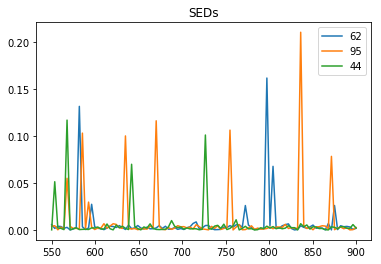

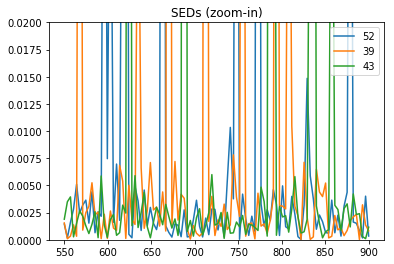

In [6]:
lbdas = np.linspace(550,900,100) # VIS 
    
for sed_idx in np.random.choice(100,3,False):
    plt.plot(lbdas, spectrums[sed_idx,:], label='{}'.format(sed_idx))
plt.legend()
plt.title('SEDs')
plt.show()
plt.close()

lbdas = np.linspace(550,900,100) # VIS
    
for sed_idx in np.random.choice(100,3,False):
    plt.plot(lbdas, spectrums[sed_idx,:], label='{}'.format(sed_idx))
plt.legend()
plt.ylim(0,0.02)
plt.title('SEDs (zoom-in)')
plt.show()
plt.close()

# main.py

In [8]:
#main
import sys
#sys.path.append('../utilities')
#from optim_utils import polychromatic_psf_field_est_2
import pickle
from numpy import arange
import numpy as np


In [10]:
#main
[output_stack,dec_stack,sig,flux,spectrums,field_pos] = pickle.load( open( "/Users/rararipe/Documents/LambdaRCA-master/Data/sim_starsx100_10dB.sav", "rb" ) )


In [19]:
#main
wvl = arange(0,dec_stack[0].shape[2]) # nb of wavelengths!!
nb_comp = 5 # what components?
D = 2
opt_shift = ['-t2','-n2']
wvl_opt = ['-t2','-n2']
wvl = wvl.astype(float)

In [ ]:
#main
# psf_est,P,A,res =  polychromatic_psf_field_est_2(output_stack,spectrums,wvl,D,opt_shift,nb_comp,nb_iter=2\
#                                                  ,nb_subiter=10,mu=0.3,tol = 0.1,sig_supp = 6,sig=None,shifts=None\
#                                                  ,flux=None,nsig_shift_est=4,simplex_en=True,wvl_en=True \
#                                                  ,wvl_opt = wvl_opt,field_pos=field_pos,nsig=5,graph_cons_en=True)


# main->optim_outils.py

In [16]:
import gc
import numpy.linalg as LA
from numpy import *
import numpy as np
import scipy.sparse.linalg as SLA
from multiprocessing import Process, Queue, Pool
import numpy.random as random
import scipy.signal as scisig
import isap
import sys
sys.path.append('../utilities')
import utils
import os
import scipy.stats as scistats
#import copy as cp
from pyflann import *
#import psf_learning_utils
import scipy
from scipy.optimize import minimize#,linear_sum_assignment
sys.path.append('../sams')
# import cost as sams_cost
# import gradient as sams_grad
# import linear as sams_linear
# import proximity as sams_prox
# import optimisation as sams_optim

try:
    import pyct
except ImportError, e:
    pass # module doesn't exist, deal with it.


### def polychromatic_psf_field_est_2( )
(im_stack_in,spectrums,wvl,D,opt_shift_est,nb_comp,field_pos=None,nb_iter=4,nb_subiter=100,mu=0.3,tol = 0.1,sig_supp = 3,sig=None,shifts=None,flux=None,nsig_shift_est=4,pos_en = True,simplex_en=False,wvl_en=True,wvl_opt=None,nsig=3,graph_cons_en=False))

In [23]:

##def polychromatic_psf_field_est_2
im_stack_in = output_stack
spectrums = spectrums
wvl = wvl
D = D
opt_shift_est = opt_shift
nb_comp = nb_comp
field_pos=None
nb_iter=2
nb_subiter=10
mu=0.3
tol = 0.1
sig_supp = 6
sig=None
shifts=None
flux=None
nsig_shift_est=4
simplex_en=True
wvl_en=True
wvl_opt = wvl_opt
field_pos=field_pos
nsig=5
graph_cons_en=True


In [24]:
im_stack = copy(im_stack_in)
if wvl_en:
    from utils import get_noise_arr

In [25]:
print "--------------- Transport architecture setting ------------------"
nb_im = im_stack.shape[-1]
shap_obs = im_stack.shape
shap = (shap_obs[0]*D,shap_obs[1]*D)
P_stack = utils.diagonally_dominated_mat_stack(shap,nb_comp,sig=sig_supp,thresh_en=True)
i,j = where(P_stack[:,:,0]>0)
supp = transpose(array([i,j]))
t = (wvl-wvl.min()).astype(float)/(wvl.max()-wvl.min())

# neighbors_graph,weights_neighbors,cent,coord_map,knn = psf_learning_utils.full_displacement(shap,supp,t,\
# pol_en=True,cent=None,theta_param=1,pol_mod=True,coord_map=None,knn=None)

--------------- Transport architecture setting ------------------


## main->optim_outils.polychromatic_psf_field_est_2( )->   psf_learning_utils.py


In [26]:
import gc
#import utils
#import optim_utils
from numpy import *
import numpy as np
from scipy.interpolate import Rbf
from scipy.fftpack import dct,idct
import scipy.signal as scisig
#from utils import bar_coord2d
import sys
sys.path.append('../../Github/python_lib/python/psf')
sys.path.append('../utilities')
#import isap
from numpy.random import randn

## def full_displacement()
(shap,supp,t,pol_en=True,cent=None,theta_param=1,pol_mod=True,coord_map=None,knn=None)

In [30]:
shap = shap
supp = supp
t = t
pol_en=True
cent=None
theta_param=1
pol_mod=True
coord_map=None
knn=None
eps = 1.e-16

In [36]:
from numpy import ones,zeros,copy,array,pi,int,transpose,diag
#from utils import polar_coord_cloud
from pyflann import FLANN

### main->optim_outils.polychromatic_psf_field_est_2( )-> psf_learning_utils.full_displacement( )->  utils.py 

In [32]:
import subprocess
import os
import random
import cv2
from numpy import zeros,size,where,ones,copy,around,double,sinc,random,pi,arange,cos,sin,arccos,transpose,diag,sqrt,arange,floor,exp,array,mean,roots,float64,int,pi,median,rot90,argsort,tile,repeat,squeeze
from numpy.linalg import svd,norm,inv,eigh
import numpy.ma as npma
from numpy.random import randn,choice
import scipy.ndimage
import scipy
import scipy.signal as scisig
import scipy.ndimage.interpolation as ndii
import scipy.fftpack as scipy_fft
from pyflann import *
from multiprocessing import Process, Queue
from astropy.io import fits
import sys
sys.path.append('../utilities')
import gaussfitter
#import great3_util
#import optim_utils
#import isap
from scipy.spatial import ConvexHull
import scipy.fftpack as fftp
#from astropy.modeling import models#, fitting
import warnings
from scipy.ndimage.interpolation import zoom
import scipy.stats as scistats
import pywt
import copy as cp
from matplotlib import pyplot as plt,animation
import datetime,time

from scipy import interpolate

import scipy.linalg as sci_lin

In [33]:
def polar_coord_cloud(coord,cent):
    from numpy import zeros
    shap = coord.shape
    out = zeros((2,shap[1]))

    for i in range(0,shap[1]):
        out[0,i],out[1,i] = polar_coord(coord[:,i],cent)

    return out

###  psf_learning_utils.full_displacement( )<-

In [34]:
if coord_map is None:
    coord_map = zeros((shap[0],shap[1],2))
    coord_map[:,:,0] = arange(0,shap[0]).reshape((shap[0],1)).dot(ones((1,shap[1])))
    coord_map[:,:,1] = ones((shap[0],1)).dot(arange(0,shap[1]).reshape((1,shap[1])))
    if pol_en:
        if cent is None:
            cent = array([shap[0]/2,shap[1]/2])
        cloud_in = zeros((2,shap[0]*shap[1]))
        cloud_in[0,:] = copy(coord_map[:,:,0].reshape((shap[0]*shap[1],)))
        cloud_in[1,:] = copy(coord_map[:,:,1].reshape((shap[0]*shap[1],)))
        cloud_out = polar_coord_cloud(cloud_in,cent)
        coord_map[:,:,0] = cloud_out[0,:].reshape((shap[0],shap[1]))
        coord_map[:,:,1] = theta_param*cloud_out[1,:].reshape((shap[0],shap[1]))/(2*pi)
        if pol_mod:
            coord_map[:,:,1] *= coord_map[:,:,0]
    knn = FLANN()
    cloud_in = zeros((shap[0]*shap[1],2))
    cloud_in[:,0] = copy(coord_map[:,:,0].reshape((shap[0]*shap[1],)))
    cloud_in[:,1] = copy(coord_map[:,:,1].reshape((shap[0]*shap[1],)))
    params = knn.build_index(array(cloud_in, dtype=float64))

advection_points = zeros((supp.shape[0],2,size(t)))

for i in range(0,supp.shape[0]):
    # Matching coordinates
    pos1_i = int(supp[i,0]/(shap[0]))
    pos1_j = int(supp[i,0]%(shap[0]))
    pos2_i = int(supp[i,1]/(shap[0]))
    pos2_j = int(supp[i,1]%(shap[0]))

    if size(t)==1:
        advection_points[i,0,0] = (1-t)*coord_map[pos1_i,pos1_j,0]+t*coord_map[pos2_i,pos2_j,0]
        advection_points[i,1,0] = (1-t)*coord_map[pos1_i,pos1_j,1]+t*coord_map[pos2_i,pos2_j,1]
    else:
        for j in range(0,size(t)):
            advection_points[i,0,j] = (1-t[j])*coord_map[pos1_i,pos1_j,0]+t[j]*coord_map[pos2_i,pos2_j,0]
            advection_points[i,1,j] = (1-t[j])*coord_map[pos1_i,pos1_j,1]+t[j]*coord_map[pos2_i,pos2_j,1]

neighbors_graph = zeros((supp.shape[0],4,size(t)))
neighbors_graph = zeros((supp.shape[0],2,4,size(t)))
weights_neighbors = zeros((supp.shape[0],4,size(t)))

if size(t)==1:
    neighbors_graph_temp,dist_neighbors = knn.nn_index(advection_points[:,:,0],4)
    neighbors_graph[:,0,:,0] = neighbors_graph_temp/shap[0]
    neighbors_graph[:,1,:,0] = neighbors_graph_temp%shap[0]
    inv_dist = (dist_neighbors+eps)**(-1)
    weights_neighbors[:,:,0] = inv_dist/(inv_dist.sum(axis=1).reshape((supp.shape[0],1)).dot(ones((1,4))))
else:
    for j in range(0,size(t)):
        print "Wavelenght ",j+1,"/",size(t)
        neighbors_graph_temp,dist_neighbors = knn.nn_index(advection_points[:,:,j],4)
        neighbors_graph[:,0,:,j] = neighbors_graph_temp/shap[0]
        neighbors_graph[:,1,:,j] = neighbors_graph_temp%shap[0]
        inv_dist = (dist_neighbors+eps)**(-1)
        weights_neighbors[:,:,j] = inv_dist/(inv_dist.sum(axis=1).reshape((supp.shape[0],1)).dot(ones((1,4))))
gc.collect()

Wavelenght  1 / 100


AttributeError: 'NoneType' object has no attribute 'nn_index'

None
